<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2018

In [47]:
import numpy as np

In [48]:
def linear_activation(W, b, X):
    z = np.dot(W,X) + b
    
    return z

In [49]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [50]:
def d_sigmoid(z):
    return sigmoid(z) * (1. - sigmoid(z))

In [51]:
def loss(y, a):
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [52]:
def cost(logloss):
    return np.mean(logloss)

In [53]:
def predict_multilayer(parameters,X):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = linear_activation(W1,b1,X)
    A1 = sigmoid(Z1)
    
    Z2 = linear_activation(W2,b2,A1)
    A2 = sigmoid(Z2)

    return np.round(A2)

<hr>
## Algunas utilidades

In [62]:
'''
UTILIDADES
'''

import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

def generate_data(data_type, noise=0.2):
    """
    Generate a binary dataset with distribution data_type

    Arguments:
    data_type -- distribution of dataset {moons,circles,blobs}

    Returns:
    X -- features
    Y -- labels
    """ 
    np.random.seed(0)
    if data_type == 'moons':
        X, Y = datasets.make_moons(200, noise=noise)
    elif data_type == 'circles':
        X, Y = sklearn.datasets.make_circles(200, noise=noise)
    elif data_type == 'blobs':
        X, Y = sklearn.datasets.make_blobs(centers=2, cluster_std=noise)
    return X, Y

def visualize_lr(parameters, X, Y):
    X = X.T
    
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = pred_func(W,b,np.c_[xx.ravel(), yy.ravel()])
    Z = predict_multilayer(parameters, np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]
    plt.scatter(X[:,0], X[:,1], color=color)
    
    plt.show()

<hr>
# Trabajemos
3. Realicemos descenso del gradiente sobre la red neural completa.

### - Dataset

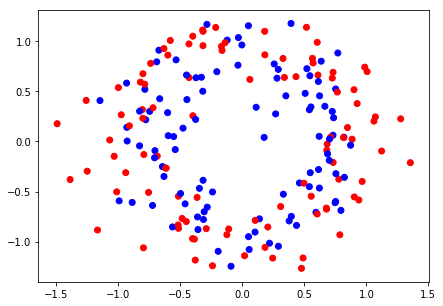

In [63]:
import numpy as np
import matplotlib.pyplot as plt

X, Y = generate_data('circles')
nx,m = X.T.shape

color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

X = X.T

### - Inicializacion de parametros de la red.

In [64]:
def initialize_parameters(neurons_hidden_layer=2):

    W1 = np.random.randn(neurons_hidden_layer, 2)
    b1 = np.zeros([neurons_hidden_layer, 1])

    W2 = np.random.randn(1, neurons_hidden_layer)
    b2 = np.zeros([1,1])
    
    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}
    
    return parameters

<hr>
### - Apliquemos descenso del gradiente a cada regresor logístico por separado

('parametros iniciales: ', {'b2': array([[ 0.]]), 'b1': array([[ 0.],
       [ 0.],
       [ 0.]]), 'W1': array([[-0.68417537,  0.58308427],
       [ 0.22231612, -0.7643537 ],
       [-0.80058137, -0.23328608]]), 'W2': array([[-0.20477477, -1.74823897,  1.35408336]])})
('costo -- iteracion ', 0, ': ', 0.7130857093117462)
('costo -- iteracion ', 1000, ': ', 0.67466380789011393)
('costo -- iteracion ', 2000, ': ', 0.61375172074572393)
('costo -- iteracion ', 3000, ': ', 0.59723099681559333)
('costo -- iteracion ', 4000, ': ', 0.59287756327246366)
('costo -- iteracion ', 5000, ': ', 0.59185836519373358)
('costo -- iteracion ', 6000, ': ', 0.59148072300818355)
('costo -- iteracion ', 7000, ': ', 0.59122800551729027)
('costo -- iteracion ', 8000, ': ', 0.59102619106997911)
('costo -- iteracion ', 9000, ': ', 0.59085846620737104)
('parametros actualizados: ', {'b2': array([[-4.07404428]]), 'b1': array([[-1.60668142],
       [-2.33637347],
       [ 3.76812036]]), 'W1': array([[-0.99230934,  2

<function matplotlib.pyplot.show>

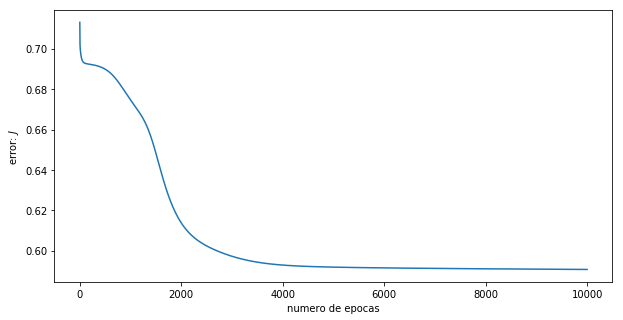

In [65]:
'''
Metaparameters initialization
'''
num_epochs = 10000
learning_rate = 0.6

'''
Parameters initialization
'''
parameters = initialize_parameters(3)
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

print ("parametros iniciales: ", parameters)

error_array = np.zeros([num_epochs])#lo utilizaremos para plotear el error

'''
Gradient descent
'''
for i in range(num_epochs): #2000 iteraciones del descenso del gradiente
    '''
    Forward Propagation
    '''
    Z1 = linear_activation(W1, b1, X)
    A1 = sigmoid(Z1)
    
    Z2 = linear_activation(W2, b2, A1)
    A2 = sigmoid(Z2)
        
    '''
    Backward Propagation
    '''
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), d_sigmoid(Z1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    '''
    Parameters Update
    '''
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2
    
    '''
    Cost estimation
    '''
    J = cost(loss(Y,A2))
    error_array[i] = J
    
    
    if(i%1000 == 0):
        print("costo -- iteracion ", i, ": ", J)
        
print("parametros actualizados: ", parameters)

'''
Testing
'''
print("Predicciones del clasificador: ", predict_multilayer(parameters,X))

'''
Visualizacion del error por epoca
'''
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,num_epochs-1, num_epochs), error_array)
plt.xlabel("numero de epocas")
plt.ylabel("error: "+r'$J$')
plt.show

### - Visualizacion del resultado

In [66]:
import matplotlib.pyplot as plt

def visualize_lr(parameters, X, Y):
    X = X.T
    
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = predict_multilayer(parameters, np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]
    plt.scatter(X[:,0], X[:,1], color=color)
    
    plt.show()

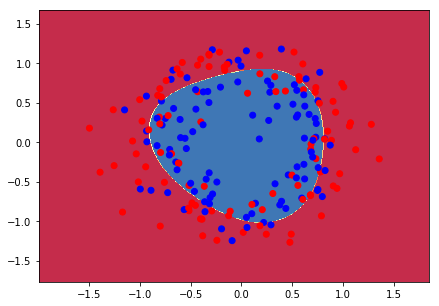

In [67]:
visualize_lr(parameters, X, Y)